In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Dataframe
path_df = r"C:\ICE-1\ICE-1\03 Feature Engineering\Pickles\df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = r"C:\ICE-1\ICE-1\03 Feature Engineering\Pickles\features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = r"C:\ICE-1\ICE-1\03 Feature Engineering\Pickles\labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = r"C:\ICE-1\ICE-1\03 Feature Engineering\Pickles\features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = r"C:\ICE-1\ICE-1\03 Feature Engineering\Pickles\labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
print(features_train.shape)
print(features_test.shape)

(926, 300)
(164, 300)


In [4]:
mnbc = MultinomialNB()
mnbc

MultinomialNB()

In [5]:
mnbc.fit(features_train, labels_train)

MultinomialNB()

In [6]:
mnbc_pred = mnbc.predict(features_test)

In [7]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.9514038876889849


In [8]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.9451219512195121


In [9]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.92      0.67      0.77        18
           1       0.97      1.00      0.99        74
           2       0.92      0.96      0.94        72

    accuracy                           0.95       164
   macro avg       0.94      0.88      0.90       164
weighted avg       0.94      0.95      0.94       164



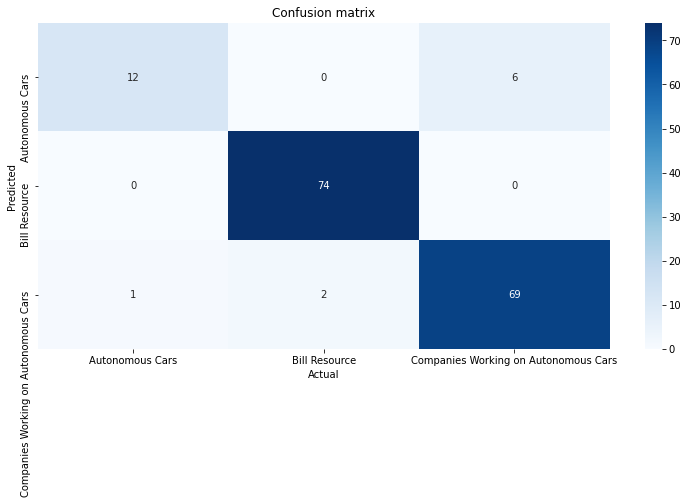

In [10]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [11]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [12]:
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.951404,0.945122


In [13]:
with open('best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)